In [1]:
import xarray as xr
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import pypsa
import shutil
from rasterio.plot import show

import os
import sys
sys.path.append('../')  # to import helpers
from scripts._helpers import _sets_path_to_root
_sets_path_to_root("pypsa-africa")

This is the repository path:  /home/max/OneDrive/PHD-Flexibility/07_pypsa-africa/0github/pypsa-africa/pypsa-africa
Had to go 1 folder(s) up.


# Input

In [20]:
# Load network
network_path = os.getcwd() + "/networks/base.nc"
n = pypsa.Network(network_path)
n

INFO:pypsa.io:Imported network base.nc has buses, lines


Network PyPSA-Eur

/home/max/anaconda3/envs/toast/lib/python3.9/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


<AxesSubplot:>

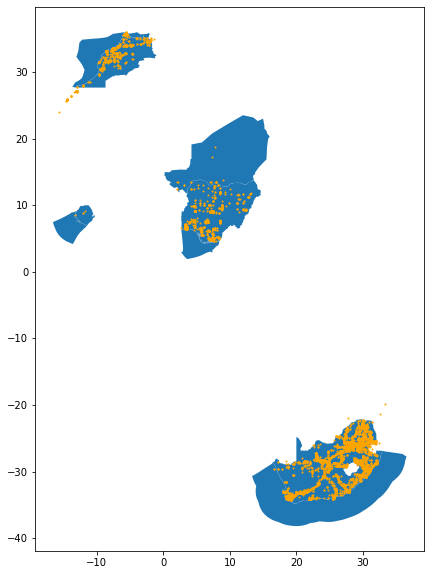

In [22]:
buses = n.buses
# Adding geometries from x and y coordinates
buses["geometry"] = gpd.points_from_xy(buses.lon, buses.lat)
buses = gpd.GeoDataFrame(buses, crs='epsg:4326')

continent = gpd.read_file('resources/country_shapes.geojson')
off_shore = gpd.read_file('resources/offshore_shapes.geojson')

ax = continent.plot(figsize=(10,10))
off_shore.plot(ax=ax)
buses.plot(ax=ax, color = "orange", markersize = 1)

# Output

<AxesSubplot:>

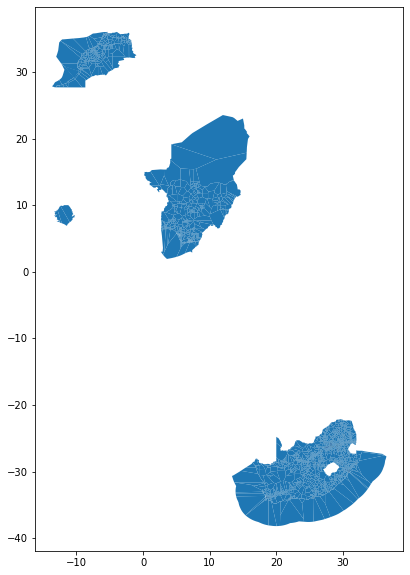

In [23]:
continent = gpd.read_file('resources/regions_offshore.geojson')
off_shore = gpd.read_file('resources/regions_onshore.geojson')

ax = continent.plot(figsize=(10,10))
off_shore.plot(ax=ax)